## Importing Libraries

Pipeline:
What are going to cover:

Build 2 kinds of CustomDataset
    * Using torchvision.datasets.ImageFolder
    * Using torch.utils.Dataset

*`torchvision.datasets.ImageFolder`*

1. Build Custom Image dataset by using `torchvision.datasets.ImageFolder`. 
2. Create transform function
3. Create DataLoader from datasets
4. Visualize the data




In [4]:
import torch
import torch.nn as nn
import torchvision
from torchvision import datasets,transforms
import os
import pathlib
import requests
import zipfile

In [6]:
# Check whether the file is available or not, if not then download
from pathlib import Path

#check whether file the already exists or not
outer_folder = Path('data')
image_path = outer_folder/'pizza_steak_sushi'

if image_path.is_dir():
    print(f"The file already exists")
else:
    print("the file doesn't exist. Try to download ......")
    image_path.mkdir(parents = True, exist_ok=True)
    
    with open(image_path/"pizza_steak_sushi.zip",'wb') as f:
        
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza steak sushi data.....")
        f.write(request.content)
    
    # Unzip pizza steak sushi zip
    with zipfile.ZipFile(image_path/"pizza_steak_sushi.zip",'r') as zip_ref:
        print("Unzipping pizza steak sushi zip.....")
        zip_ref.extractall(image_path)
        

The file already exists


In [7]:
import os

for dir_paths,dir_names,file_names in os.walk(image_path):
    print(f"There are {len(dir_names)} directories and {len(file_names)} in {dir_paths}")

There are 2 directories and 1 in data/pizza_steak_sushi
There are 3 directories and 1 in data/pizza_steak_sushi/test
There are 0 directories and 19 in data/pizza_steak_sushi/test/steak
There are 0 directories and 31 in data/pizza_steak_sushi/test/sushi
There are 0 directories and 25 in data/pizza_steak_sushi/test/pizza
There are 3 directories and 0 in data/pizza_steak_sushi/train
There are 0 directories and 75 in data/pizza_steak_sushi/train/steak
There are 0 directories and 72 in data/pizza_steak_sushi/train/sushi
There are 0 directories and 78 in data/pizza_steak_sushi/train/pizza


## Train & Test directory



In [8]:
train_dir = image_path/'train'
test_dir = image_path/'test'

In [10]:
train_dir,test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

In [11]:
image_path

PosixPath('data/pizza_steak_sushi')

In [15]:
## Convert the directories into list
img_path_list = list(image_path.glob('*/*/*.jpg'))

In [16]:
len(img_path_list)

300

In [18]:
train_img_list = list(train_dir.glob("*/*.jpg"))
test_img_list = list(test_dir.glob("*/*.jpg"))

In [19]:
len(train_img_list),len(test_img_list)

(225, 75)

In [22]:
first_img = train_img_list[0]

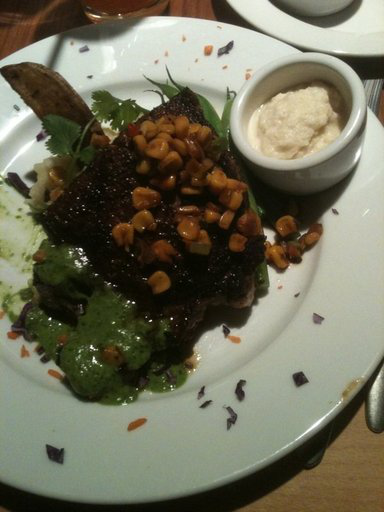

In [23]:
from PIL import Image
Image.open(first_img)

In [24]:
## Get the class name from the list name
img_class = first_img.parent.stem

In [25]:
img_class

'steak'

In [26]:
type(first_img)

pathlib.PosixPath

In [ ]:
'''# The full process in a row

# 1. Got the directory first
# 2. make a list from the directory
img_list = list(image_path.glob('*/*/*.jpg'))

# 3. after that assign a variable to get a particular item from the image list
img = img_list[0] # img is the path of a specific image
# 4. Declare the class name of the image
img_class = img.parent.stem'''

(-0.5, 511.5, 511.5, -0.5)

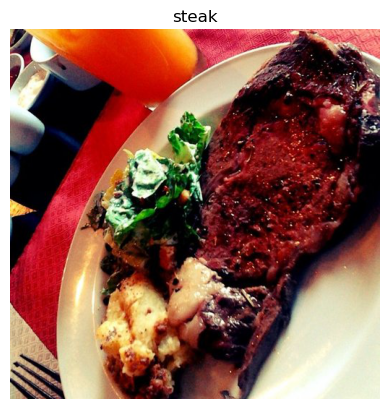

In [34]:
# get some random image and visualize it

import random
import numpy as np

full_img_list = list(image_path.glob('*/*/*.jpg'))

random_img = random.choice(full_img_list)

img = Image.open(random_img)

rand_img_cls = random_img.parent.stem

# turn the image into tensors
rand_img_tensors = np.asarray(random_img)

# Plot the image by matplotlib
import matplotlib.pyplot as plt
plt.imshow(img)
plt.title(rand_img_cls)
plt.axis("off")

In [ ]:
## Creating a Transfrom Function which converts the image into tensors

## Create the datasets by using `torchvision.datasets.ImageFolder`

In [ ]:
from torchvision.datasets import ImageFolder

train_data = ImageFolder()